In [1]:
!pip install -U layoutparser

In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-4vmnl6mv/detectron2_a5e45d1561d546048319f5d2caee750e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-4vmnl6mv/detectron2_a5e45d1561d546048319f5d2caee750e
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [3]:

!pip install layoutparser[ocr]

  Using cached google_api_core-1.34.0-py3-none-any.whl (120 kB)
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.1
    Uninstalling google-api-core-2.11.1:
      Successfully uninstalled google-api-core-2.11.1


In [25]:
import cv2
image = cv2.imread("/content/Screenshot 2023-08-03 142508.png")
image = image[..., ::-1]


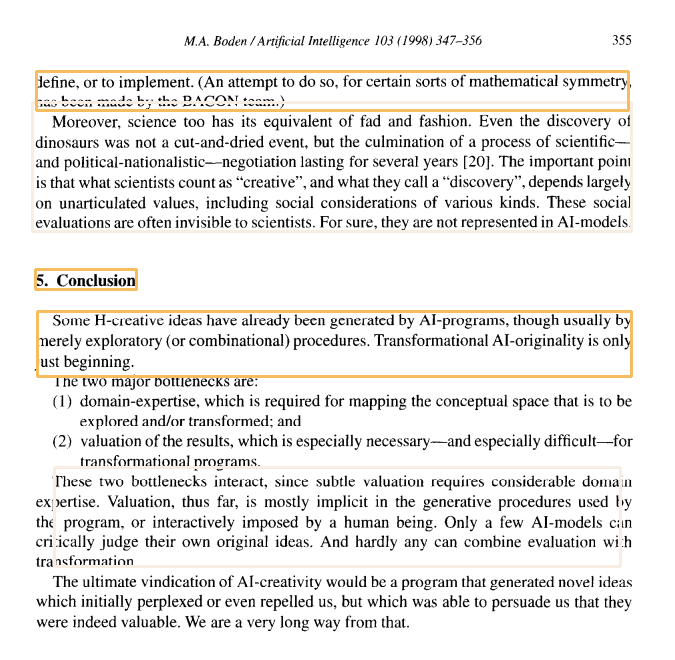

In [26]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [6]:
!pip install easyocr

In [7]:
import easyocr

In [27]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
text_blocks



Layout(_blocks=[TextBlock(block=Rectangle(x_1=32.958961486816406, y_1=102.93397521972656, x_2=631.1626586914062, y_2=231.6322479248047), text=None, id=None, type=Text, parent=None, next=None, score=0.8624120950698853), TextBlock(block=Rectangle(x_1=54.699424743652344, y_1=467.4677429199219, x_2=620.4513549804688, y_2=566.235595703125), text=None, id=None, type=Text, parent=None, next=None, score=0.7415698170661926)], page_data={})

In [28]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [29]:

text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [30]:
h, w = image.shape[:2]
left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])


text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

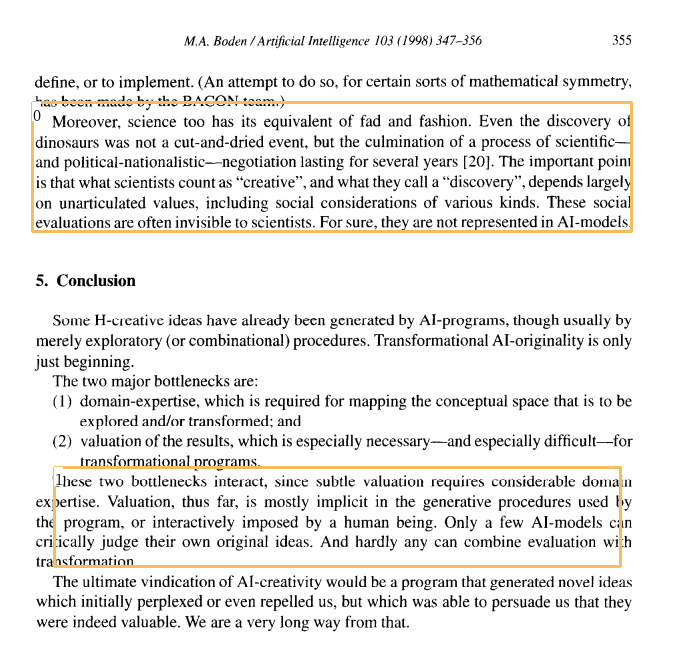

In [31]:
lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [8]:
ocr_agent = easyocr.Reader(['en'])

In [32]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [33]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [34]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [35]:

for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

has been made by the BACON team.)

Moreover, science too has its equivalent of fad and fashion. Even the discovery of
dinosaurs was not a cut-and-dried event, but the culmination of a process of scientific—
and political-nationalistic—negotiation lasting for several years [20]. The important point
is that what scientists count as “creative”, and what they call a “discovery”, depends largely
on unarticulated values, including social considerations of various kinds. These social
evaluations are often invisible to scientists. For sure, they are not represented in AI-models.

   

---
 

EE LOE
These two bottlenecks interact, since subtle valuation requires considerable domai
pertise. Valuation, thus far, is mostly implicit in the generative procedures used b
e program, or interactively imposed by a human being. Only a few Al-models ca
ically judge their own original ideas. And hardly any can combine evaluation wit
nsformation.

 

---
